# Importer données

In [1]:
import pandas
import numpy as np
import statistics
import scipy.stats as stats
# pip install seaborn
import seaborn as sns
# pip install matplotlib
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1 = pd.read_csv("C:/Users/alfon/Documents/ESGI/Reporting et Restitution/projetFinal/CO2/CO2.csv", sep=",")
df2 = pd.read_csv("C:/Users/alfon/Documents/ESGI/Reporting et Restitution/projetFinal/CO2/CO2metadata.csv", sep=",")
df_pib = pd.read_csv("C:/Users/alfon/Documents/ESGI/Reporting et Restitution/projetFinal/PIB/pib.csv")
df_srf = pd.read_csv("C:/Users/alfon/Documents/ESGI/Reporting et Restitution/projetFinal/SRF/srf.csv")
df_pop = pd.read_csv("C:/Users/alfon/Documents/ESGI/Reporting et Restitution/projetFinal/POP/pop.csv")

## Le dataset CO2.csv contenait des agrégations tels que "word", "pays ocde", etc,  qui ont été supprimés du fichier pour ne pas considérer des doublons

In [3]:
df1["Country Name"].unique()

array(['China', 'United States', 'India', 'Russian Federation', 'Japan',
       'Germany', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Saudi Arabia',
       'Indonesia', 'Canada', 'Mexico', 'South Africa', 'Brazil',
       'United Kingdom', 'Australia', 'Turkey', 'Poland', 'Thailand',
       'Malaysia', 'Kazakhstan', 'Spain', 'Egypt, Arab Rep.',
       'United Arab Emirates', 'Ukraine', 'Argentina', 'Pakistan',
       'Vietnam', 'Iraq', 'Netherlands', 'Venezuela, RB', 'Algeria',
       'Philippines', 'Nigeria', 'Qatar', 'Czech Republic', 'Kuwait',
       'Colombia', 'Belgium', 'Uzbekistan', 'Chile', 'Bangladesh',
       'Turkmenistan', 'Romania', 'Israel', 'Oman', 'Greece', 'Austria',
       'Morocco', 'Belarus', 'Peru', 'Libya', 'Portugal', 'Finland',
       'Hungary', 'Serbia', 'Trinidad and Tobago', 'Hong Kong SAR, China',
       'Sweden', 'Bulgaria', 'Ecuador', 'Norway', 'Ireland', 'Azerbaijan',
       'Singapore', 'Angola', 'Switzerland', 'New Zealand',
       'Slovak Republic', 'Denmar

In [4]:
df_pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0


In [5]:
df_pop.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

## On conserve la surface de 2018

In [6]:
df_srf = df_srf[["Country Code", "2018"]]

In [7]:
df_pib.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [8]:
df1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,...,6697654.489,7553070.247,7557789.676,8776040.416,9733538.120,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,...,5789030.561,5614110.994,5263505.457,5395532.125,5270047.385,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077


In [9]:
df2.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN


In [10]:
print(df1.shape)
print(df2.shape)

(218, 61)
(263, 6)


## Merge pour avoir Region et Income groupe dans le même dataFrame

In [11]:
df_co2 = df1.merge(df2, how="left", on="Country Code")
print(df_co2.shape)

(218, 66)


In [12]:
df_co2.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,...,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,...,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077,North America,High income,NaN,United States,NaN


In [13]:
print(df_co2["Indicator Name"].unique())

['CO2 emissions (kt)']


In [14]:
df_co2 = df_co2.drop('Indicator Name', 1)
df_co2 = df_co2.drop('Indicator Code', 1)
df_co2 = df_co2.drop('Unnamed: 5', 1)
df_co2 = df_co2.drop('TableName', 1)
df_co2 = df_co2.drop('SpecialNotes', 1)

In [15]:
df_co2 = df_co2.sort_values(by="Country Name")

In [16]:
df_co2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,IncomeGroup
106,Afghanistan,AFG,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,...,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488,8672.455,South Asia,Low income
131,Albania,ALB,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,...,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753,4536.079,Europe & Central Asia,Upper middle income
31,Algeria,DZA,6160.560,6065.218,5669.182,5427.160,5650.847,6596.933,8430.433,8441.434,...,121399.702,119177.500,121187.016,129987.816,134465.223,145411.218,153133.920,150005.969,Middle East & North Africa,Lower middle income
205,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Upper middle income
182,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,517.047,517.047,491.378,487.711,476.710,462.042,465.709,469.376,Europe & Central Asia,High income


## Transposition des donnees

In [17]:
df_co2_melt = df_co2.melt(id_vars=["Country Name", "Country Code", "Region","IncomeGroup"])

In [18]:
df_co2_melt.head()

,Country Name,Country Code,Region,IncomeGroup,variable,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
2,Algeria,DZA,Middle East & North Africa,Lower middle income,1960,6160.560
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,1960,NaN
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN


In [19]:
df_co2_melt.columns = ["Country", "Country Code", "Region", "IncomeGroup", "Year", "CO2"]

In [20]:
df_co2_melt = df_co2_melt.sort_values(by=["Country", "Year"])

In [21]:
df_co2_melt.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
218,Afghanistan,AFG,South Asia,Low income,1961,491.378
436,Afghanistan,AFG,South Asia,Low income,1962,689.396
654,Afghanistan,AFG,South Asia,Low income,1963,707.731
872,Afghanistan,AFG,South Asia,Low income,1964,839.743


In [22]:
df_co2_melt['CO2_Region_Year'] = df_co2_melt.groupby(['Region', 'Year'])["CO2"].transform('sum')

In [23]:
df_co2_melt['CO2_IncomeGroup_Year'] = df_co2_melt.groupby(['IncomeGroup', 'Year'])["CO2"].transform('sum')

In [24]:
df_co2_melt.head(20)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276
436,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327
654,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923
872,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009
1090,Afghanistan,AFG,South Asia,Low income,1965,1008.425,209767.068,61011.546
1308,Afghanistan,AFG,South Asia,Low income,1966,1092.766,216364.001,66545.049
1526,Afghanistan,AFG,South Asia,Low income,1967,1283.450,219829.316,72001.545
1744,Afghanistan,AFG,South Asia,Low income,1968,1224.778,241530.622,83519.592
1962,Afghanistan,AFG,South Asia,Low income,1969,942.419,244372.547,92525.744


In [25]:
df_co2_region_year = df_co2_melt[["Region", "Year", "CO2_Region_Year"]]
print(df_co2_region_year.shape)

(12426, 3)


In [26]:
df_co2_region_year = df_co2_region_year.drop_duplicates()
print(df_co2_region_year.shape)

(456, 3)


In [27]:
df_co2_region_year = df_co2_region_year[df_co2_region_year["Region"].notnull()]
print(df_co2_region_year.shape)

(399, 3)


In [28]:
df_co2_region_year.head(20)

,Region,Year,CO2_Region_Year
0,South Asia,1960,151645.118
218,South Asia,1961,162624.116
436,South Asia,1962,179019.273
654,South Asia,1963,194453.676
872,South Asia,1964,191982.118
1090,South Asia,1965,209767.068
1308,South Asia,1966,216364.001
1526,South Asia,1967,219829.316
1744,South Asia,1968,241530.622
1962,South Asia,1969,244372.547


In [29]:
df_co2_Incomegroup_year = df_co2_melt[["IncomeGroup", "Year", "CO2_IncomeGroup_Year"]]
print(df_co2_Incomegroup_year.shape)

(12426, 3)


In [30]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year.drop_duplicates()
print(df_co2_Incomegroup_year.shape)

(285, 3)


In [31]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year[df_co2_Incomegroup_year["IncomeGroup"].notnull()]
print(df_co2_Incomegroup_year.shape)

(228, 3)


In [32]:
df_co2_Incomegroup_year_pivot = df_co2_Incomegroup_year.pivot("IncomeGroup", "Year", "CO2_IncomeGroup_Year")

In [33]:
df_co2_Incomegroup_year_pivot.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,5163044.325,5277047.688,5527628.466,5838454.387,6133424.200,6405790.625,6686547.146,6988542.931,7361348.486,7843353.634,...,1.356978e+07,1.339555e+07,1.267893e+07,1.308972e+07,1.285161e+07,1.278680e+07,1.279028e+07,1.270110e+07,1.200871e+07,1.177276e+07
Low income,36460.981,39706.276,43934.327,46823.923,51437.009,61011.546,66545.049,72001.545,83519.592,92525.744,...,2.013183e+05,2.152786e+05,2.000422e+05,1.990301e+05,1.843218e+05,1.737975e+05,1.668228e+05,1.748096e+05,1.607649e+05,1.643183e+05
Lower middle income,211160.528,224457.070,246440.735,268362.061,284687.545,313106.795,328071.822,326883.714,353737.155,367008.028,...,2.888210e+06,3.078791e+06,3.200253e+06,3.316893e+06,3.499128e+06,3.714345e+06,3.736262e+06,3.982718e+06,4.101459e+06,4.229048e+06
Upper middle income,2708981.582,2543500.873,2530285.005,2659411.076,2818760.561,3008249.119,3209105.377,3265848.535,3432121.316,3689918.750,...,1.252093e+07,1.367714e+07,1.353731e+07,1.500151e+07,1.623133e+07,1.670244e+07,1.684622e+07,1.693218e+07,1.683839e+07,1.671832e+07


In [34]:
df_co2_region_year_pivot = df_co2_region_year.pivot("Region", "Year", "CO2_Region_Year")

In [35]:
df_co2_region_year_pivot

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1202974.018,1039169.128,950919.106,995212.799,1048960.018,1142956.229,1234513.885,1243828.065,1381505.580,1609468.302,...,1.000234e+07,1.094005e+07,1.090385e+07,1.227860e+07,1.335693e+07,1.372970e+07,1.390204e+07,1.386372e+07,1.386268e+07,1.368487e+07
Europe & Central Asia,3166989.882,3275210.386,3457973.666,3702687.244,3895069.065,4076369.212,4254640.417,4397913.774,4593672.902,4831862.887,...,6.970542e+06,6.958206e+06,6.392538e+06,6.690904e+06,6.679151e+06,6.654355e+06,6.501903e+06,6.273991e+06,5.600213e+06,5.639908e+06
Latin America & Caribbean,297987.754,304911.050,323865.773,323561.412,348911.383,359725.366,377330.633,406677.634,432240.291,470289.083,...,1.569747e+06,1.656718e+06,1.621753e+06,1.706255e+06,1.728818e+06,1.808487e+06,1.845113e+06,1.870075e+06,1.851263e+06,1.815792e+06
Middle East & North Africa,98634.966,104861.532,114531.411,133046.094,154648.391,184329.089,210771.826,225010.787,260456.009,302333.149,...,1.928725e+06,2.086633e+06,2.184454e+06,2.268890e+06,2.302443e+06,2.513149e+06,2.492354e+06,2.630361e+06,2.648172e+06,2.608737e+06
North America,3083748.982,3074863.841,3194551.054,3330490.411,3493998.274,3643256.175,3821399.035,3977818.587,4135118.219,4332347.814,...,6.361607e+06,6.176552e+06,5.796174e+06,5.923404e+06,5.793266e+06,5.600088e+06,5.690058e+06,5.766677e+06,5.676901e+06,5.551809e+06
South Asia,151645.118,162624.116,179019.273,194453.676,191982.118,209767.068,216364.001,219829.316,241530.622,244372.547,...,1.629457e+06,1.798176e+06,1.977507e+06,1.977587e+06,2.106042e+06,2.286206e+06,2.307900e+06,2.525679e+06,2.645135e+06,2.736913e+06
Sub-Saharan Africa,117666.696,123071.854,127428.250,133599.811,154740.066,171754.946,175249.597,182198.562,186202.926,202132.374,...,7.178226e+05,7.504259e+05,7.402610e+05,7.615149e+05,7.997324e+05,7.854054e+05,8.002091e+05,8.603039e+05,8.249577e+05,8.464133e+05


# Analyse Monovarie

### Evolution d'emition de CO2 par region

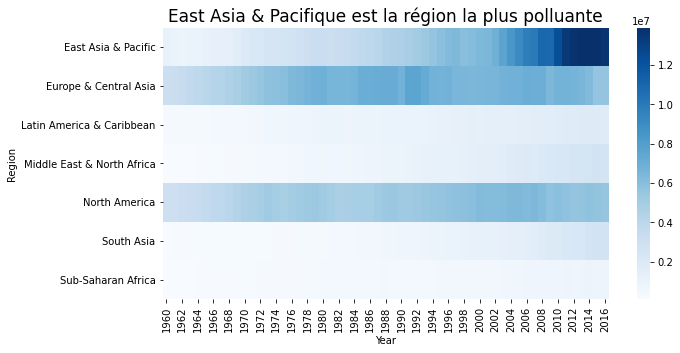

In [36]:
plt.figure(figsize=(10,5))
h1 =sns.heatmap(df_co2_region_year_pivot, cmap="Blues")
h1.set(title='East Asia & Pacifique est la région la plus polluante')
h1.title.set_size(17)

### Evolution des émissions de CO2 par niveau de Income

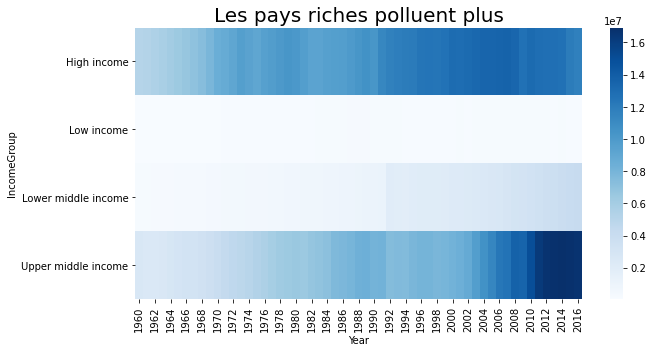

In [37]:
plt.figure(figsize=(10,5))
g = sns.heatmap(df_co2_Incomegroup_year_pivot, cmap="Blues")
g.set(title='Les pays riches polluent plus')
g.title.set_size(20)

In [38]:
df_co2_Incomegroup_year.head(2)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

,IncomeGroup,Year,CO2_IncomeGroup_Year
0,Low income,1960,36460.981
218,Low income,1961,39706.276


<ipython-input-39-ff64fd1881f0>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels,  rotation=90,
<ipython-input-39-ff64fd1881f0>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labelsy.astype(int),


[Text(0, -2500000.0, '36460'),
 Text(0, 0.0, '39706'),
 Text(0, 2500000.0, '43934'),
 Text(0, 5000000.0, '46823'),
 Text(0, 7500000.0, '51437'),
 Text(0, 10000000.0, '61011'),
 Text(0, 12500000.0, '66545'),
 Text(0, 15000000.0, '72001'),
 Text(0, 17500000.0, '83519'),
 Text(0, 20000000.0, '92525')]

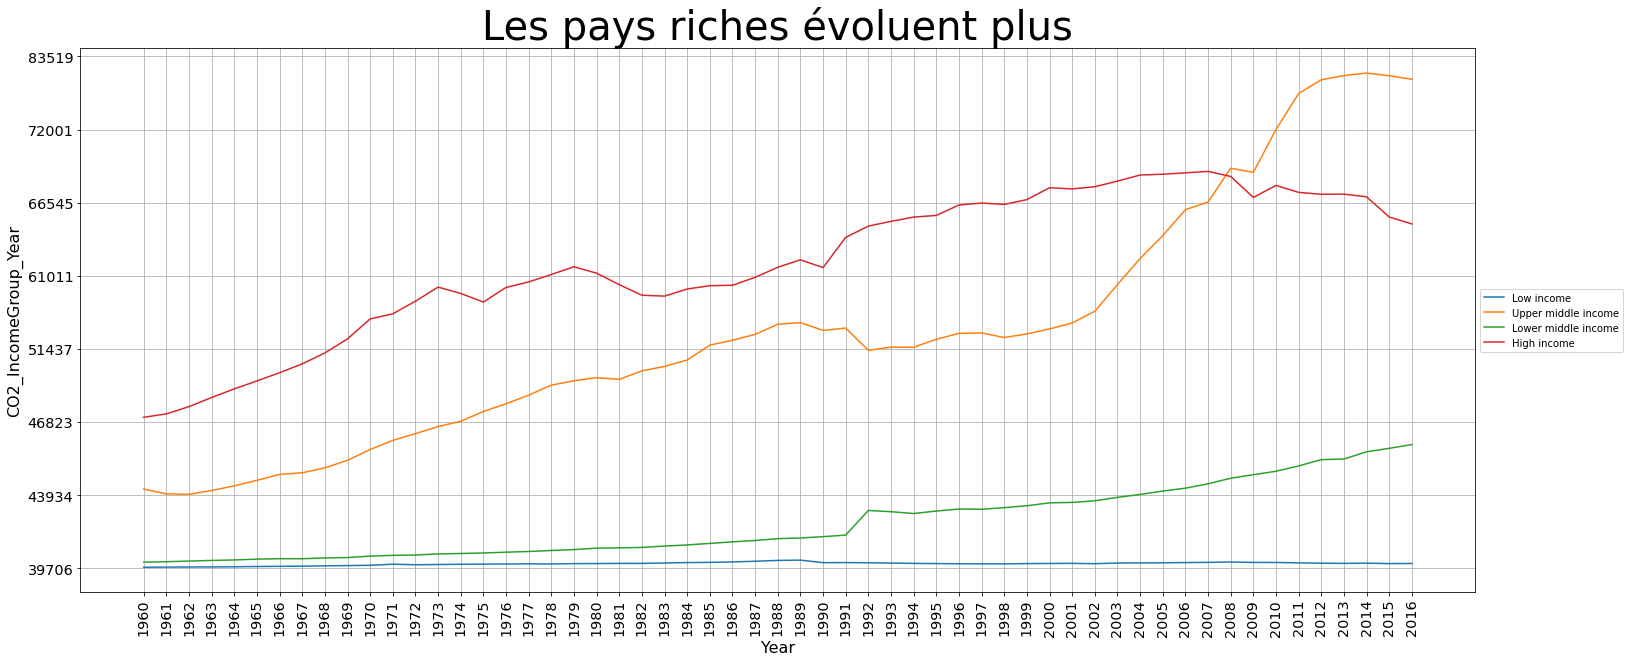

In [39]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_Incomegroup_year, x="Year", y="CO2_IncomeGroup_Year", hue="IncomeGroup")
labels = df_co2_Incomegroup_year["Year"].unique()
labelsy=df_co2_Incomegroup_year["CO2_IncomeGroup_Year"].unique()
# g.set_xticks(len(labels))
g.set(title='Les pays riches évoluent plus')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')


<ipython-input-40-87a15d753c87>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels,  rotation=90,
<ipython-input-40-87a15d753c87>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labelsy.astype(int),


[Text(0, -2000000.0, '151645'),
 Text(0, 0.0, '162624'),
 Text(0, 2000000.0, '179019'),
 Text(0, 4000000.0, '194453'),
 Text(0, 6000000.0, '191982'),
 Text(0, 8000000.0, '209767'),
 Text(0, 10000000.0, '216364'),
 Text(0, 12000000.0, '219829'),
 Text(0, 14000000.0, '241530'),
 Text(0, 16000000.0, '244372')]

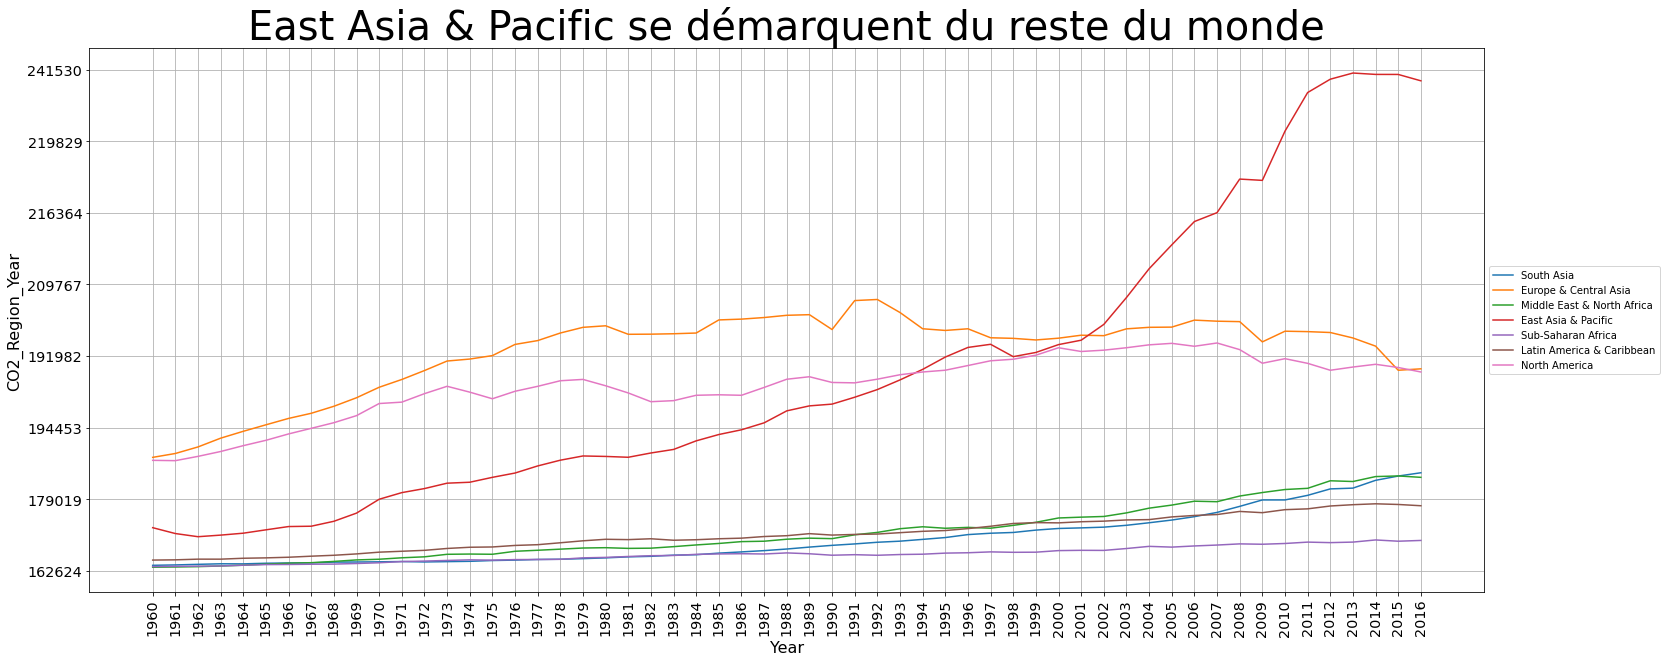

In [40]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_region_year, x="Year", y="CO2_Region_Year", hue="Region")
labels = df_co2_region_year["Year"].unique()
labelsy=df_co2_region_year["CO2_Region_Year"].unique()
g.set(title='East Asia & Pacific se démarquent du reste du monde')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')

In [41]:
df1['Country Name'] = df1['Country Name'].astype("category")

In [42]:
df1.dtypes

Country Name      category
Country Code        object
Indicator Name      object
Indicator Code      object
1960               float64
                    ...   
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
Length: 61, dtype: object

In [43]:
df_co2.shape

(218, 61)

In [44]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [45]:
df_pib.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,AFG,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.881570e+10
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [46]:
df_pib_melt = df_pib.melt(id_vars=["Country Code"])

In [47]:
df_pib_melt.head()

,Country Code,variable,value
0,ABW,1960,NaN
1,AFG,1960,537777811.1
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN


In [48]:
df_pib_melt.columns = ["Country Code", "Year", "PIB"]

In [49]:
df_pop_melt = df_pop.melt(id_vars=["Country Code"])

In [50]:
df_pop_melt.columns = ["Country Code", "Year", "Population"]

In [51]:
df_pib_melt.head(2)

,Country Code,Year,PIB
0,ABW,1960,NaN
1,AFG,1960,537777811.1


In [52]:
df_pop_melt.head(2)

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996973.0


In [53]:
df_srf.columns = ["Country Code", "Surface"]

In [54]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_srf, how="left", on="Country Code")
print(df_pib_melt.shape)

(15840, 3)
(15840, 4)


In [55]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_pop_melt, how="left", on=["Country Code", "Year"])
print(df_pib_melt.shape)

(15840, 4)
(15840, 5)


In [56]:
print(df_co2_melt.shape)
df_all = df_co2_melt.merge(df_pib_melt, how="left", on=["Country Code", "Year"])
print(df_all.shape)

(12426, 8)
(12426, 11)


In [57]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [58]:
df_pib_melt.head(2)

,Country Code,Year,PIB,Surface,Population
0,ABW,1960,NaN,180.0,54211.0
1,AFG,1960,537777811.1,652860.0,8996973.0


In [59]:
df_all['PIB/Capita'] = df_all['PIB']/df_all['Population']

In [60]:
df_all['CO2/Capita'] = df_all['CO2']/df_all['Population']

In [61]:
df_all.head(100)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981,5.377778e+08,652860.0,8996973.0,59.773194,0.000046
1,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276,5.488889e+08,652860.0,9169410.0,59.860874,0.000054
2,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327,5.466667e+08,652860.0,9351441.0,58.458015,0.000074
3,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923,7.511112e+08,652860.0,9543205.0,78.706388,0.000074
4,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009,8.000000e+08,652860.0,9744781.0,82.095231,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,ALB,Europe & Central Asia,Upper middle income,1998,1752.826,6491246.393,7889209.469,2.545967e+09,28750.0,3128530.0,813.790263,0.000560
96,Albania,ALB,Europe & Central Asia,Upper middle income,1999,2984.938,6446288.973,8013473.098,3.212119e+09,28750.0,3108778.0,1033.241693,0.000960
97,Albania,ALB,Europe & Central Asia,Upper middle income,2000,3021.608,6495910.817,8183970.263,3.480355e+09,28750.0,3089027.0,1126.683318,0.000978
98,Albania,ALB,Europe & Central Asia,Upper middle income,2001,3223.293,6578909.695,8386014.629,3.922099e+09,28750.0,3060173.0,1281.659393,0.001053


In [62]:
df_all.columns

Index(['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'CO2',
       'CO2_Region_Year', 'CO2_IncomeGroup_Year', 'PIB', 'Surface',
       'Population', 'PIB/Capita', 'CO2/Capita'],
      dtype='object')

In [63]:
print(df_all.shape)
df_corr = df_all[['CO2', 'PIB', 'Surface', 'Population', 'PIB/Capita', 'CO2/Capita']].drop_duplicates()
print(df_corr.shape)

(12426, 13)
(12396, 6)


In [64]:
df_corr.head()

,CO2,PIB,Surface,Population,PIB/Capita,CO2/Capita
0,414.371,537777811.1,652860.0,8996973.0,59.773194,0.000046
1,491.378,548888895.6,652860.0,9169410.0,59.860874,0.000054
2,689.396,546666677.8,652860.0,9351441.0,58.458015,0.000074
3,707.731,751111191.1,652860.0,9543205.0,78.706388,0.000074
4,839.743,800000044.4,652860.0,9744781.0,82.095231,0.000086


# EXTRACT COUNTRIES WITH THEIR CORRELATION CO2/PIB

In [65]:
countries = df_all["Country"].unique().tolist()

In [66]:
df_Alemania = df_all[df_all["Country"]=="Germany"][["Country", 'CO2', 'PIB']].drop_duplicates()

In [107]:
import math

In [108]:
positive_dict_of_countries_according_PIB_CO2_corr = {}
negative_dict_of_countries_according_PIB_CO2_corr = {}
indxP = 0
indxN = 0
for country in countries:
    temp = df_all[df_all["Country"]==country][["Country", 'CO2', 'PIB']].drop_duplicates()
    if temp.corr()["PIB"][0]>0 and not math.isnan(temp.corr()["PIB"][0]):
        positive_dict_of_countries_according_PIB_CO2_corr[indxP] = (country , temp.corr()["PIB"][0])
        indxP += 1
    elif not math.isnan(temp.corr()["PIB"][0]):
        negative_dict_of_countries_according_PIB_CO2_corr[indxN] = (country , temp.corr()["PIB"][0])
        indxN += 1
        

In [109]:
b = positive_dict_of_countries_according_PIB_CO2_corr.items()
print(sorted(b))
# b = b.sorted(key=lambda x:x[1][1])
# print(b)

[(0, ('Afghanistan', 0.9459049257219457)), (1, ('Albania', 0.027348817909068707)), (2, ('Algeria', 0.867780623439578)), (3, ('Andorra', 0.6005072026004478)), (4, ('Angola', 0.9653740803699463)), (5, ('Antigua and Barbuda', 0.7521599058322418)), (6, ('Argentina', 0.9097698000239121)), (7, ('Armenia', 0.8022491261311978)), (8, ('Aruba', 0.6243242694770029)), (9, ('Australia', 0.8355759939137193)), (10, ('Austria', 0.7296779991405957)), (11, ('Azerbaijan', 0.002687497852123662)), (12, ('Bahrain', 0.9596994736138101)), (13, ('Bangladesh', 0.9427828221398197)), (14, ('Barbados', 0.9349987914995113)), (15, ('Belarus', 0.09358084156429194)), (16, ('Belize', 0.940000104894686)), (17, ('Benin', 0.9845999520949719)), (18, ('Bermuda', 0.6366096568019372)), (19, ('Bhutan', 0.9237900385594158)), (20, ('Bolivia', 0.9390685565950039)), (21, ('Bosnia and Herzegovina', 0.9404237230589285)), (22, ('Botswana', 0.9378824465943262)), (23, ('Brazil', 0.9099752177309376)), (24, ('Brunei Darussalam', 0.471582

In [110]:
print(positive_dict_of_countries_according_PIB_CO2_corr)

{0: ('Afghanistan', 0.9459049257219457), 1: ('Albania', 0.027348817909068707), 2: ('Algeria', 0.867780623439578), 3: ('Andorra', 0.6005072026004478), 4: ('Angola', 0.9653740803699463), 5: ('Antigua and Barbuda', 0.7521599058322418), 6: ('Argentina', 0.9097698000239121), 7: ('Armenia', 0.8022491261311978), 8: ('Aruba', 0.6243242694770029), 9: ('Australia', 0.8355759939137193), 10: ('Austria', 0.7296779991405957), 11: ('Azerbaijan', 0.002687497852123662), 12: ('Bahrain', 0.9596994736138101), 13: ('Bangladesh', 0.9427828221398197), 14: ('Barbados', 0.9349987914995113), 15: ('Belarus', 0.09358084156429194), 16: ('Belize', 0.940000104894686), 17: ('Benin', 0.9845999520949719), 18: ('Bermuda', 0.6366096568019372), 19: ('Bhutan', 0.9237900385594158), 20: ('Bolivia', 0.9390685565950039), 21: ('Bosnia and Herzegovina', 0.9404237230589285), 22: ('Botswana', 0.9378824465943262), 23: ('Brazil', 0.9099752177309376), 24: ('Brunei Darussalam', 0.47158248334010966), 25: ('Burkina Faso', 0.976984530138

In [111]:
print(negative_dict_of_countries_according_PIB_CO2_corr)

{0: ('Bahamas, The', -0.296035262887938), 1: ('Belgium', -0.400715596872361), 2: ('Bulgaria', -0.4192363675704776), 3: ('Czech Republic', -0.7810220693917247), 4: ('Denmark', -0.645305474254396), 5: ('Eritrea', -0.5866735971161017), 6: ('Faroe Islands', -0.5700057273305718), 7: ('France', -0.36675800012241094), 8: ('Germany', -0.8811905911409773), 9: ('Hungary', -0.7729138098632524), 10: ('Kosovo', -0.12098442790303737), 11: ('Latvia', -0.23295251106015472), 12: ('Liechtenstein', -0.7070357058665588), 13: ('Lithuania', -0.3257263204202995), 14: ('Luxembourg', -0.28467268117959765), 15: ('Moldova', -0.22093259350170613), 16: ('North Macedonia', -0.8555379691517151), 17: ('Poland', -0.6749288695135102), 18: ('Romania', -0.586926254815409), 19: ('Russian Federation', -0.16202422559854693), 20: ('Serbia', -0.36233009538711447), 21: ('Slovak Republic', -0.8417825333654014), 22: ('South Sudan', -0.32430477880794795), 23: ('Sweden', -0.6773866993063011), 24: ('Ukraine', -0.3823340029465775), 

In [113]:
sorted(negative_dict_of_countries_according_PIB_CO2_corr.items(), key=lambda t: t[1][1])

[(8, ('Germany', -0.8811905911409773)),
 (16, ('North Macedonia', -0.8555379691517151)),
 (21, ('Slovak Republic', -0.8417825333654014)),
 (25, ('United Kingdom', -0.8408003398059744)),
 (3, ('Czech Republic', -0.7810220693917247)),
 (9, ('Hungary', -0.7729138098632524)),
 (12, ('Liechtenstein', -0.7070357058665588)),
 (23, ('Sweden', -0.6773866993063011)),
 (17, ('Poland', -0.6749288695135102)),
 (4, ('Denmark', -0.645305474254396)),
 (26, ('Uzbekistan', -0.6262482930539478)),
 (18, ('Romania', -0.586926254815409)),
 (5, ('Eritrea', -0.5866735971161017)),
 (6, ('Faroe Islands', -0.5700057273305718)),
 (2, ('Bulgaria', -0.4192363675704776)),
 (1, ('Belgium', -0.400715596872361)),
 (24, ('Ukraine', -0.3823340029465775)),
 (7, ('France', -0.36675800012241094)),
 (20, ('Serbia', -0.36233009538711447)),
 (13, ('Lithuania', -0.3257263204202995)),
 (22, ('South Sudan', -0.32430477880794795)),
 (0, ('Bahamas, The', -0.296035262887938)),
 (14, ('Luxembourg', -0.28467268117959765)),
 (11, ('Lat

In [70]:
for i in positive_dict_of_countries_according_PIB_CO2_corr:
    print(positive_dict_of_countries_according_PIB_CO2_corr.get(i))

('Afghanistan', 0.9459049257219457)
('Albania', 0.027348817909068707)
('Algeria', 0.867780623439578)
('Andorra', 0.6005072026004478)
('Angola', 0.9653740803699463)
('Antigua and Barbuda', 0.7521599058322418)
('Argentina', 0.9097698000239121)
('Armenia', 0.8022491261311978)
('Aruba', 0.6243242694770029)
('Australia', 0.8355759939137193)
('Austria', 0.7296779991405957)
('Azerbaijan', 0.002687497852123662)
('Bahrain', 0.9596994736138101)
('Bangladesh', 0.9427828221398197)
('Barbados', 0.9349987914995113)
('Belarus', 0.09358084156429194)
('Belize', 0.940000104894686)
('Benin', 0.9845999520949719)
('Bermuda', 0.6366096568019372)
('Bhutan', 0.9237900385594158)
('Bolivia', 0.9390685565950039)
('Bosnia and Herzegovina', 0.9404237230589285)
('Botswana', 0.9378824465943262)
('Brazil', 0.9099752177309376)
('Brunei Darussalam', 0.47158248334010966)
('Burkina Faso', 0.9769845301384773)
('Burundi', 0.9121686592004363)
('Cabo Verde', 0.9674354197449581)
('Cambodia', 0.9837157790866391)
('Cameroon', 0

In [112]:
for i in negative_dict_of_countries_according_PIB_CO2_corr:
    print(negative_dict_of_countries_according_PIB_CO2_corr.get(i))

('Bahamas, The', -0.296035262887938)
('Belgium', -0.400715596872361)
('Bulgaria', -0.4192363675704776)
('Czech Republic', -0.7810220693917247)
('Denmark', -0.645305474254396)
('Eritrea', -0.5866735971161017)
('Faroe Islands', -0.5700057273305718)
('France', -0.36675800012241094)
('Germany', -0.8811905911409773)
('Hungary', -0.7729138098632524)
('Kosovo', -0.12098442790303737)
('Latvia', -0.23295251106015472)
('Liechtenstein', -0.7070357058665588)
('Lithuania', -0.3257263204202995)
('Luxembourg', -0.28467268117959765)
('Moldova', -0.22093259350170613)
('North Macedonia', -0.8555379691517151)
('Poland', -0.6749288695135102)
('Romania', -0.586926254815409)
('Russian Federation', -0.16202422559854693)
('Serbia', -0.36233009538711447)
('Slovak Republic', -0.8417825333654014)
('South Sudan', -0.32430477880794795)
('Sweden', -0.6773866993063011)
('Ukraine', -0.3823340029465775)
('United Kingdom', -0.8408003398059744)
('Uzbekistan', -0.6262482930539478)


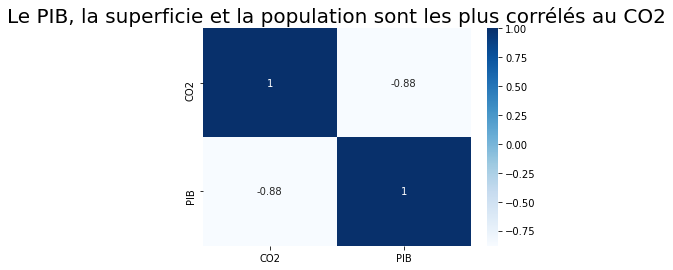

In [72]:
g=sns.heatmap(df_Alemania.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

In [73]:
df_Alemania.corr()["PIB"][0]

-0.8811905911409773

# Analyse bivariée

### Matrice de correlation

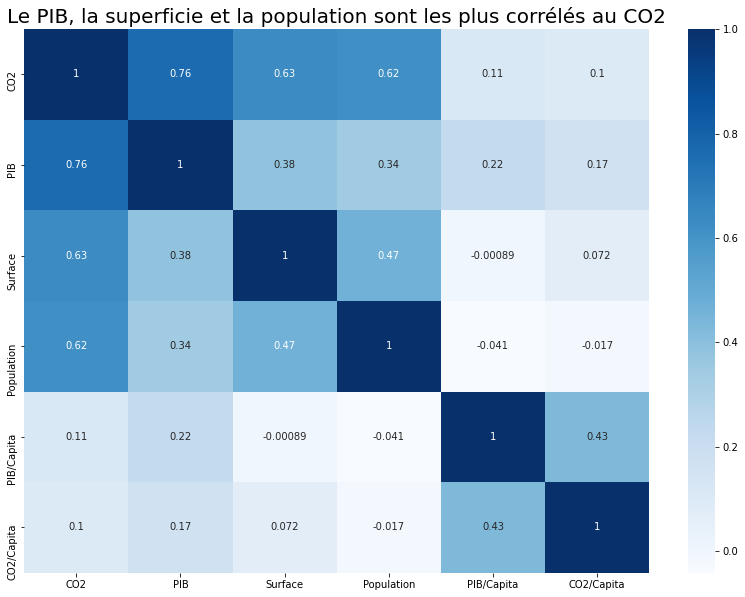

In [74]:
plt.figure(figsize=(14,10))
g=sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

### Tableau de contingence 2016

In [75]:
df_cont16 = df_all[df_all['Year']=="2016"]

t_contingence2016 = pd.crosstab(df_cont16['Region'],
                            df_cont16['IncomeGroup'], 
                               margins = False)
print(t_contingence2016)

IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific                  14           1                   12   
Europe & Central Asia                38           1                    4   
Latin America & Caribbean            17           1                    4   
Middle East & North Africa            8           2                    6   
North America                         3           0                    0   
South Asia                            0           1                    6   
Sub-Saharan Africa                    2          23                   18   

IncomeGroup                 Upper middle income  
Region                                           
East Asia & Pacific                          10  
Europe & Central Asia                        15  
Latin America & Caribbean                    20  
Middle East & North Africa                    5  
North America  

### Tableau de contingence 1960

In [76]:
df_cont60 = df_all[df_all['Year']=="1960"]

t_contingence1960 = pd.crosstab(df_cont60['Region'],
                            df_cont60['IncomeGroup'], 
                               margins = False)
print(t_contingence1960)

IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific                  14           1                   12   
Europe & Central Asia                38           1                    4   
Latin America & Caribbean            17           1                    4   
Middle East & North Africa            8           2                    6   
North America                         3           0                    0   
South Asia                            0           1                    6   
Sub-Saharan Africa                    2          23                   18   

IncomeGroup                 Upper middle income  
Region                                           
East Asia & Pacific                          10  
Europe & Central Asia                        15  
Latin America & Caribbean                    20  
Middle East & North Africa                    5  
North America  

## Nuage des points

In [77]:
df_all2016 = df_all[df_all["Year"]=="2016"]

## Bivarie entre PIB et CO2

### Hypothèse : les points orange representent la Chine et les rouges les Etats Unis

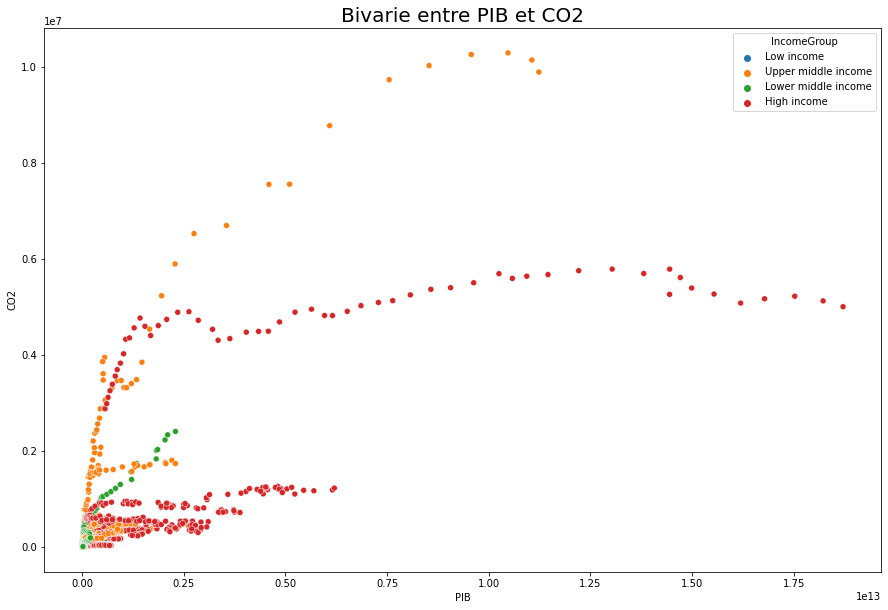

In [78]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Bivarie entre PIB et CO2')
g.title.set_size(20)

### le même pour 2016

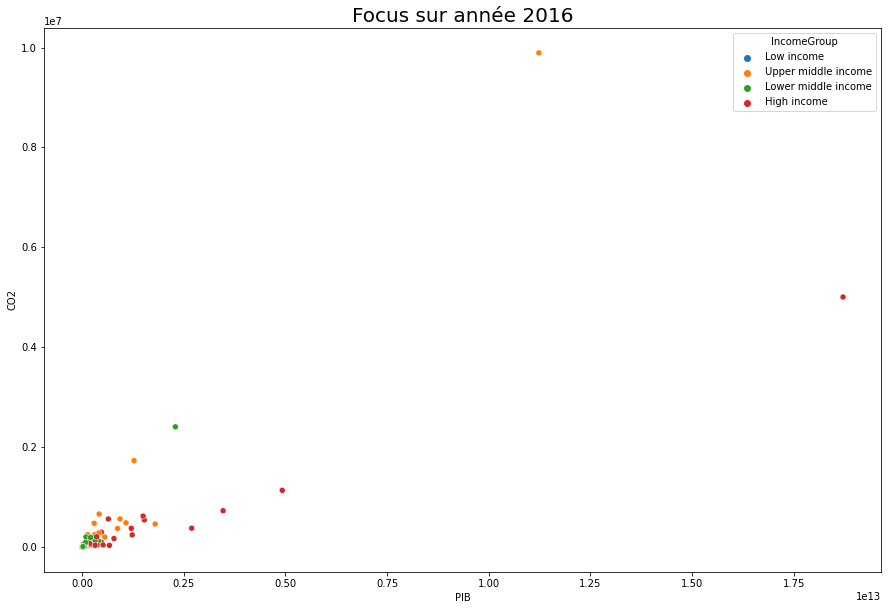

In [79]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all2016, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Focus sur année 2016')
g.title.set_size(20)

#### On voit qu'il y a deux pays qui sont des valeurs Extremes (outliers)

## Bivarie entre Population et CO2

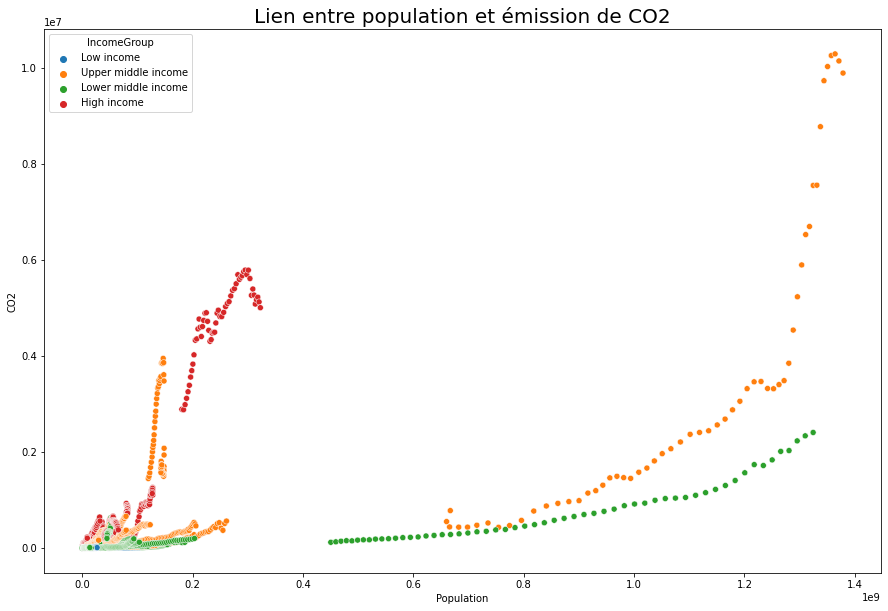

In [80]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="Population", y="CO2", hue="IncomeGroup")
g.set(title='Lien entre population et émission de CO2')
g.title.set_size(20)

## Top 10 des pays les plus polluants en 2016

In [81]:
df_all2016['pctg_CO2_2016'] = (df_all2016['CO2'] / df_all2016['CO2'].sum())*100

<ipython-input-81-53cb7d0af7f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all2016['pctg_CO2_2016'] = (df_all2016['CO2'] / df_all2016['CO2'].sum())*100


In [82]:
df_all2016 = df_all2016.sort_values(by="pctg_CO2_2016", ascending = False)

In [83]:
df_all2016.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,pctg_CO2_2016
2393,China,CHN,East Asia & Pacific,Upper middle income,2016,9893037.952,1.368487e+07,1.671832e+07,1.123330e+13,9600012.9,1.378665e+09,8147.954724,0.007176,30.081164
11855,United States,USA,North America,High income,2016,5006302.077,5.551809e+06,1.177276e+07,1.871500e+13,9831510.0,3.229413e+08,57951.706278,0.015502,15.222361
5129,India,IND,South Asia,Lower middle income,2016,2407671.526,2.736913e+06,4.229048e+06,2.294800e+12,3287259.0,1.324510e+09,1732.565788,0.001818,7.320862
9290,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2016,1732026.776,5.639908e+06,1.671832e+07,1.276790e+12,17098250.0,1.443424e+08,8845.564620,0.011999,5.266469
5642,Japan,JPN,East Asia & Pacific,High income,2016,1135886.253,1.368487e+07,1.177276e+07,4.922540e+12,377974.0,1.269945e+08,38761.832785,0.008944,3.453821


### Conserver que les dix les plus polluants en 2016

In [84]:
df_top10 = df_all2016.head(10)

In [85]:
df_top10['Country'].unique().tolist()

['China',
 'United States',
 'India',
 'Russian Federation',
 'Japan',
 'Germany',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Saudi Arabia',
 'Indonesia']

In [86]:
df_all_top = df_all[df_all['Country'].isin(df_top10['Country'].unique().tolist())]

In [87]:
df_all_top.head(10)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626
2342,China,CHN,East Asia & Pacific,Upper middle income,1965,475972.933,1142956.229,3008249.119,7.043627e+10,9600012.9,715185000.0,98.486778,0.000666
2343,China,CHN,East Asia & Pacific,Upper middle income,1966,522789.522,1234513.885,3209105.377,7.672029e+10,9600012.9,735400000.0,104.324566,0.000711
2344,China,CHN,East Asia & Pacific,Upper middle income,1967,433234.048,1243828.065,3265848.535,7.288163e+10,9600012.9,754550000.0,96.589532,0.000574
2345,China,CHN,East Asia & Pacific,Upper middle income,1968,468928.626,1381505.580,3432121.316,7.084654e+10,9600012.9,774510000.0,91.472718,0.000605
2346,China,CHN,East Asia & Pacific,Upper middle income,1969,577237.138,1609468.302,3689918.750,7.970591e+10,9600012.9,796025000.0,100.129903,0.000725


In [88]:
df_all_top['CO2/surface'] = df_all_top['CO2']/df_all_top['Surface']

<ipython-input-88-cc73f737b82e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_top['CO2/surface'] = df_all_top['CO2']/df_all_top['Surface']


In [89]:
df_all_top['CO2/population'] = df_all_top['CO2']/df_all_top['Population']

<ipython-input-89-1b6fe1f11c07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_top['CO2/population'] = df_all_top['CO2']/df_all_top['Population']


In [90]:
df_all_top = df_all_top.drop_duplicates()

In [91]:
df_all_top.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/surface,CO2/population
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,0.081326,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,0.057507,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,0.045871,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,0.045489,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,0.045513,0.000626


## Evolution des emissions de CO2/surface du top 10 de 2016

<ipython-input-92-41318a4565c5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels,  rotation=90,
<ipython-input-92-41318a4565c5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labelsy.astype(int),


[Text(0, -1.0, '151645'),
 Text(0, 0.0, '162624'),
 Text(0, 1.0, '179019'),
 Text(0, 2.0, '194453'),
 Text(0, 3.0, '191982'),
 Text(0, 4.0, '209767'),
 Text(0, 5.0, '216364'),
 Text(0, 6.0, '219829'),
 Text(0, 7.0, '241530')]

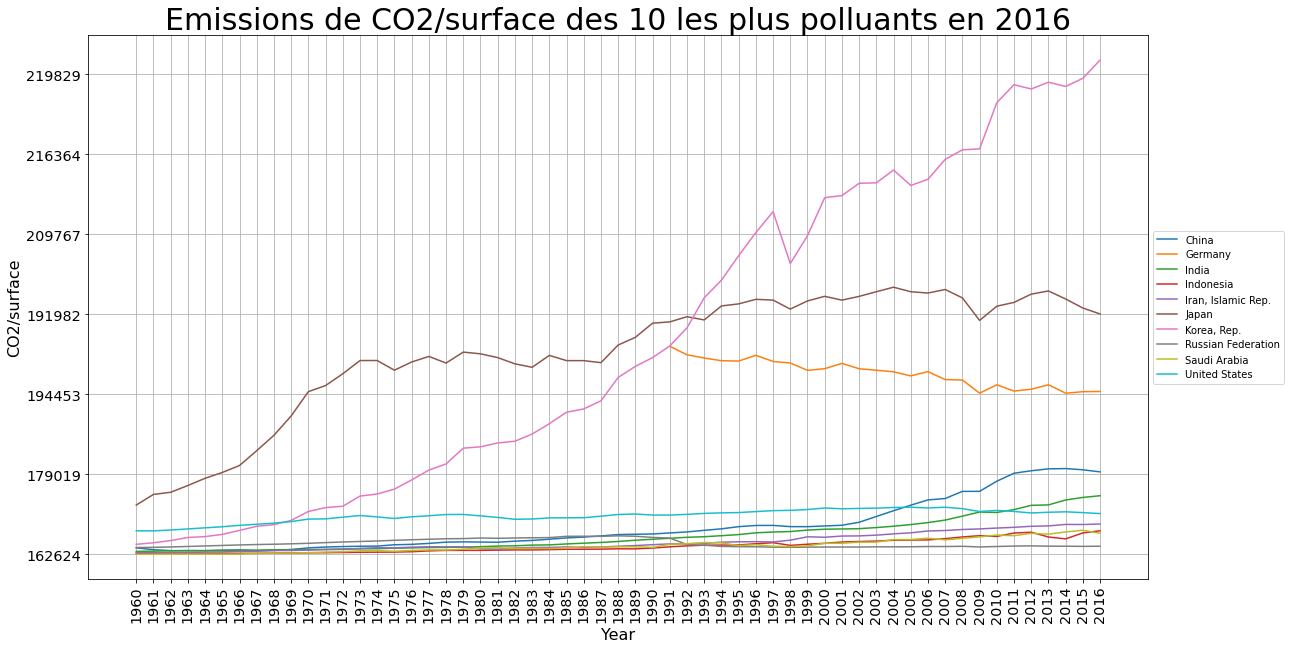

In [92]:
plt.figure(figsize=(19,10))

g = sns.lineplot(data=df_all_top, x="Year", y="CO2/surface", hue="Country")

g.set(title='Emissions de CO2/surface des 10 les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
# g.legend(fontsize=100)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')



## Evolution des emissions de CO2/population du top 10 de 2016

<ipython-input-93-cfd4cb65f861>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels,  rotation=90,
<ipython-input-93-cfd4cb65f861>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labelsy.astype(int),


[Text(0, -0.005, '151645'),
 Text(0, 0.0, '162624'),
 Text(0, 0.005, '179019'),
 Text(0, 0.009999999999999998, '194453'),
 Text(0, 0.015, '191982'),
 Text(0, 0.02, '209767'),
 Text(0, 0.024999999999999998, '216364'),
 Text(0, 0.030000000000000002, '219829')]

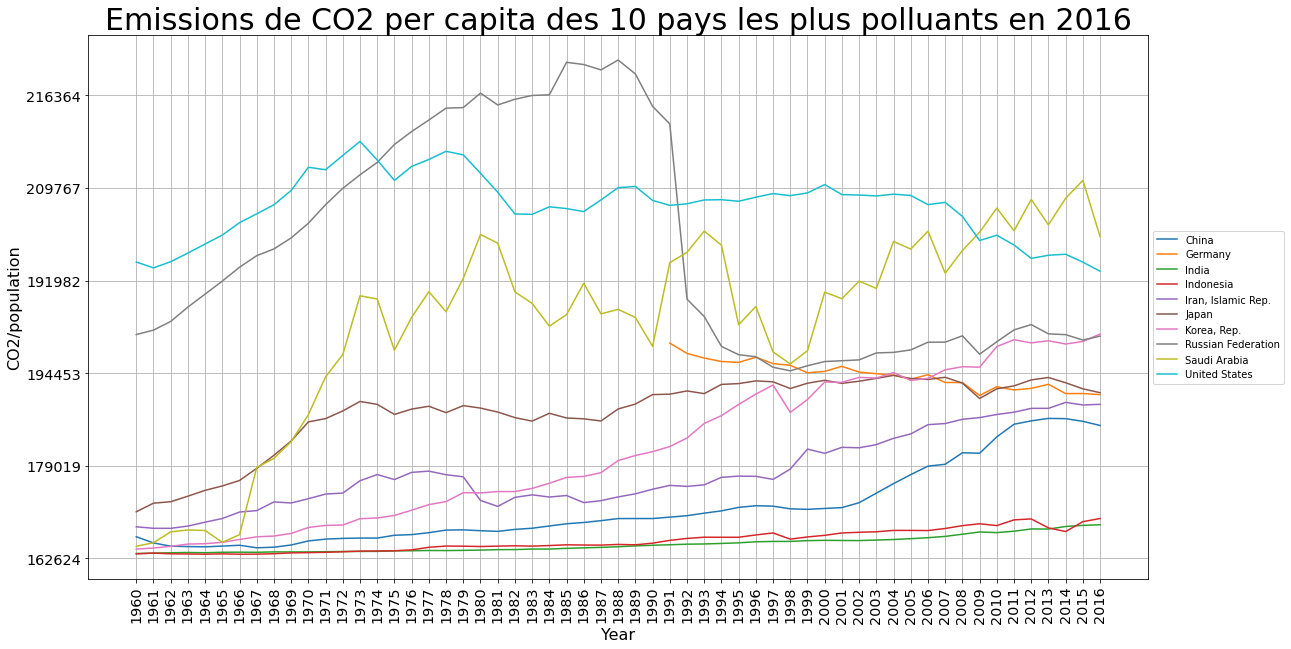

In [93]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2/population", hue="Country")

g.set(title='Emissions de CO2 per capita des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')


<ipython-input-94-93f73cd28183>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels,  rotation=90,
<ipython-input-94-93f73cd28183>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(labelsy.astype(int),


[Text(0, -2000000.0, '151645'),
 Text(0, 0.0, '162624'),
 Text(0, 2000000.0, '179019'),
 Text(0, 4000000.0, '194453'),
 Text(0, 6000000.0, '191982'),
 Text(0, 8000000.0, '209767'),
 Text(0, 10000000.0, '216364'),
 Text(0, 12000000.0, '219829')]

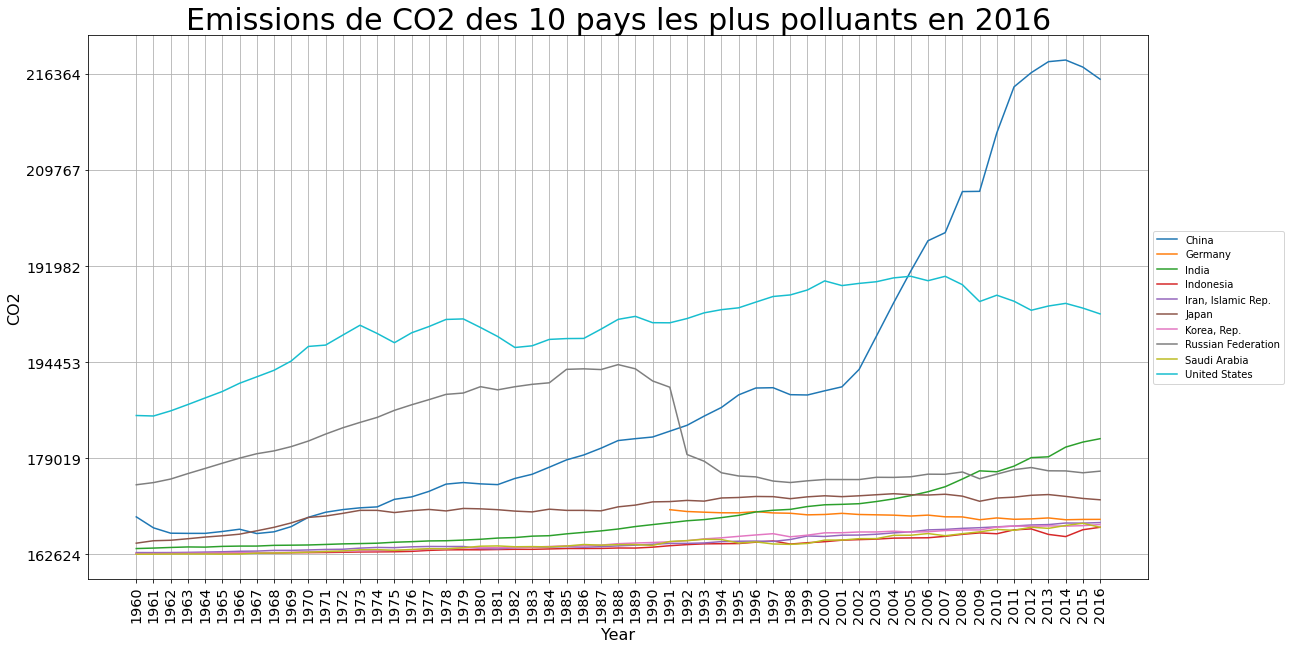

In [94]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2", hue="Country")

g.set(title='Emissions de CO2 des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')

